## Imports

In [1]:
import os
import sys
import sklearn
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import accuracy_score

## Data

In [2]:
# Load in data

in_file_path_chords = os.path.join(os.getcwd(), 'Data//Chords', 'input.txt')
out_file_path_chords = os.path.join(os.getcwd(), 'Data//Chords', 'output.txt')

in_file_path_isolated = os.path.join(os.getcwd(), 'Data//Isolated', 'input.txt')
out_file_path_isolated = os.path.join(os.getcwd(), 'Data//Isolated', 'output.txt')

inp_chords = pd.read_csv(in_file_path_chords,sep="	",header=None)
out_chords = pd.read_csv(out_file_path_chords,sep="	",header=None)

inp_isolated = pd.read_csv(in_file_path_isolated,sep="	",header=None)
out_isolated = pd.read_csv(out_file_path_isolated,sep="	",header=None)

inp = pd.concat([inp_chords,inp_isolated],axis=0,ignore_index=True)
out = pd.concat([out_chords,out_isolated],axis=0,ignore_index=True)
out_save = out.copy()

In [3]:
out=out_save.copy()
a=out.copy()
b=out.copy()
a=a.iloc[:,0:88]
b=b.iloc[:,100]
out=pd.concat([a,b],axis=1,ignore_index=True)

In [4]:
display(inp.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.812025,1.624050,1.624050,3.913080,3.913080,3.913080,3.913080,3.913080,3.913080,...,1.106185,0.858407,0.847096,0.793684,0.778737,0.748067,0.724419,0.706611,0.686300,0.662116
2,0,1.418441,2.836882,2.836882,4.859394,4.859394,4.859394,4.859394,4.859394,4.859394,...,-0.025381,0.409624,0.221173,0.071951,0.036677,-0.037756,-0.045958,-0.132260,-0.132902,-0.205372
3,0,1.941972,3.883943,3.883943,3.923695,3.923695,3.923695,3.923695,3.923695,3.923695,...,-0.823510,-0.783446,-0.680334,-0.707531,-0.660219,-0.635870,-0.607445,-0.481730,-0.491079,-0.412551
4,0,1.519993,3.039987,3.039987,3.752422,3.752422,3.752422,3.752422,3.752422,3.752422,...,0.069886,-0.022846,-0.014781,0.056528,0.041726,0.100550,0.107269,0.041530,0.060296,0.072066
5,0,0.768128,1.536256,1.536256,1.963922,1.963922,1.963922,1.963922,1.963922,1.963922,...,-0.043950,-0.141456,-0.074712,0.032988,0.067159,0.063161,0.052910,0.093240,0.086584,0.090886
6,0,0.000000,0.000000,0.000000,1.242890,1.242890,1.242890,1.242890,1.242890,1.242890,...,-0.157488,-0.188632,-0.160135,-0.089689,-0.118595,-0.101636,-0.097888,-0.102011,-0.070883,-0.077959
7,0,0.032415,0.064830,0.064830,0.245909,0.245909,0.245909,0.245909,0.245909,0.245909,...,-0.010176,-0.007416,-0.002725,-0.026662,0.011976,0.008913,-0.016778,0.013893,0.017804,0.014665
8,0,0.000000,0.000000,0.000000,0.226729,0.226729,0.226729,0.226729,0.226729,0.226729,...,0.046430,0.040876,0.035996,0.033969,-0.000022,0.007236,0.039297,0.010850,0.003968,0.012074
9,0,0.000000,0.000000,0.000000,0.015566,0.015566,0.015566,0.015566,0.015566,0.015566,...,0.038984,0.023695,0.016702,0.024266,0.033282,0.008172,0.027050,0.022300,0.020181,0.009479


In [5]:
display(out.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Get some info

In [6]:
count_empty = np.sum(out.iloc[:,out.shape[1]-1],axis=0)
count_not_empty = out.shape[0] - count_empty
print('Empty instances:',count_empty)
print('Not empty instances:',count_not_empty)


Empty instances: 26370
Not empty instances: 12740


In [7]:
only_notes=out.iloc[:,0:out.shape[1]-1]
count_notes = np.sum(only_notes,axis=1)
count_notes_hot = pd.get_dummies(count_notes)
out_hot=pd.concat([only_notes,count_notes_hot],axis=1,ignore_index=True)
display(out_hot.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
empty = out_hot.iloc[:,88].get_values()
empty_idx = np.where(empty==1)[0]
not_empty_idx = np.where(empty==0)[0]

# How many empty?
num_empty = 1000

# Get random empty index
ii = random.sample(range(0,empty_idx.shape[0]),num_empty)
rand_empty_idx = empty_idx[ii]


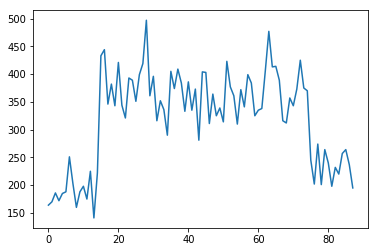

In [9]:
plt.plot(np.sum(out.iloc[:,0:out.shape[1]-1],axis=0))

In [10]:
empty.shape

(39110,)

In [11]:
# Split no note info
X_n = pd.concat([inp.iloc[not_empty_idx,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_n = pd.concat([out.iloc[not_empty_idx,0:out.shape[1]-1],out.iloc[rand_empty_idx,0:out.shape[1]-1]],axis=0,ignore_index=True)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_n,y_n,train_size=0.80,test_size=0.20)
print('X_train_n shape:',X_train_n.shape)
print('y_train_n shape:',y_train_n.shape)
print('X_test_n shape:',X_test_n.shape)
print('y_test_n shape:',y_test_n.shape)

X_train_n shape: (10992, 396)
y_train_n shape: (10992, 88)
X_test_n shape: (2748, 396)
y_test_n shape: (2748, 88)


In [12]:
# Split with empty
X_e = pd.concat([inp.iloc[not_empty_idx,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_e = pd.concat([out.iloc[not_empty_idx,:],out.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_e,X_test_e,y_train_e,y_test_e = train_test_split(X_e,y_e,train_size=0.80,test_size=0.20)
print('X_train_e shape:',X_train_e.shape)
print('y_train_e shape:',y_train_e.shape)
print('X_test_e shape:',X_test_e.shape)
print('y_test_e shape:',y_test_e.shape)

X_train_e shape: (10992, 396)
y_train_e shape: (10992, 89)
X_test_e shape: (2748, 396)
y_test_e shape: (2748, 89)


In [13]:
# Split note one_hot
X_h = pd.concat([inp.iloc[not_empty_idx,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_h = pd.concat([out_hot.iloc[not_empty_idx,:],out_hot.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_h,X_test_h,y_train_h,y_test_h = train_test_split(X_h,y_h,train_size=0.80,test_size=0.20)
print('X_train_h shape:',X_train_h.shape)
print('y_train_h shape:',y_train_h.shape)
print('X_test_h shape:',X_test_h.shape)
print('y_test_h shape:',y_test_h.shape)

X_train_h shape: (10992, 396)
y_train_h shape: (10992, 96)
X_test_h shape: (2748, 396)
y_test_h shape: (2748, 96)


## Training

In [14]:
# Single layer, no note info
model_s_n = keras.Sequential()
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='relu',input_dim=X_n.shape[1]))
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='softmax'))
model_s_n.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_n.fit(X_train_n,y_train_n,epochs=100, batch_size=32)
print('Done')

Epoch 1/100
10992/10992 [==============================] - 1s 95us/step - loss: 8.9711 - acc: 0.0482
Epoch 2/100
10992/10992 [==============================] - 1s 70us/step - loss: 8.2202 - acc: 0.1748
Epoch 3/100
10992/10992 [==============================] - 1s 71us/step - loss: 7.3438 - acc: 0.3205
Epoch 4/100
10992/10992 [==============================] - 1s 78us/step - loss: 6.6553 - acc: 0.4184
Epoch 5/100
10992/10992 [==============================] - 1s 71us/step - loss: 6.1935 - acc: 0.4723
Epoch 6/100
10992/10992 [==============================] - 1s 70us/step - loss: 5.8475 - acc: 0.5073
Epoch 7/100
10992/10992 [==============================] - 1s 70us/step - loss: 5.5835 - acc: 0.5374
Epoch 8/100
10992/10992 [==============================] - 1s 85us/step - loss: 5.4041 - acc: 0.5443
Epoch 9/100
10992/10992 [==============================] - 1s 75us/step - loss: 5.2402 - acc: 0.5551
Epoch 10/100
10992/10992 [==============================] - 1s 73us/step - loss: 5.1123 - a

10992/10992 [==============================] - 1s 89us/step - loss: 3.4963 - acc: 0.6470
Epoch 82/100
10992/10992 [==============================] - 1s 84us/step - loss: 3.5013 - acc: 0.6417
Epoch 83/100
10992/10992 [==============================] - 1s 65us/step - loss: 3.4861 - acc: 0.6408
Epoch 84/100
10992/10992 [==============================] - 1s 74us/step - loss: 3.4988 - acc: 0.6390
Epoch 85/100
10992/10992 [==============================] - 1s 56us/step - loss: 3.4720 - acc: 0.6416
Epoch 86/100
10992/10992 [==============================] - 1s 58us/step - loss: 3.4693 - acc: 0.6418
Epoch 87/100
10992/10992 [==============================] - 1s 74us/step - loss: 3.4596 - acc: 0.6434
Epoch 88/100
10992/10992 [==============================] - 1s 70us/step - loss: 3.4601 - acc: 0.6436
Epoch 89/100
10992/10992 [==============================] - 1s 58us/step - loss: 3.4415 - acc: 0.6437
Epoch 90/100
10992/10992 [==============================] - 1s 96us/step - loss: 3.4436 - acc: 

In [15]:
# Single layer, with empty
model_s_e = keras.Sequential()
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='relu',input_dim=X_e.shape[1]))
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='softmax'))
model_s_e.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_e.fit(X_train_e,y_train_e,epochs=100, batch_size=32)
print('Done')

Epoch 1/100
10992/10992 [==============================] - 1s 114us/step - loss: 9.4737 - acc: 0.0604
Epoch 2/100
10992/10992 [==============================] - 1s 78us/step - loss: 8.8723 - acc: 0.1840
Epoch 3/100
10992/10992 [==============================] - 1s 72us/step - loss: 8.0388 - acc: 0.3176
Epoch 4/100
10992/10992 [==============================] - 1s 79us/step - loss: 7.3362 - acc: 0.4203
Epoch 5/100
10992/10992 [==============================] - 1s 76us/step - loss: 6.7951 - acc: 0.4804
Epoch 6/100
10992/10992 [==============================] - 1s 76us/step - loss: 6.4128 - acc: 0.5182
Epoch 7/100
10992/10992 [==============================] - 1s 94us/step - loss: 6.1067 - acc: 0.5522
Epoch 8/100
10992/10992 [==============================] - 1s 88us/step - loss: 5.8594 - acc: 0.5622
Epoch 9/100
10992/10992 [==============================] - 1s 87us/step - loss: 5.6629 - acc: 0.5756
Epoch 10/100
10992/10992 [==============================] - 1s 96us/step - loss: 5.4878 - 

10992/10992 [==============================] - 1s 59us/step - loss: 3.6953 - acc: 0.6955
Epoch 82/100
10992/10992 [==============================] - 1s 73us/step - loss: 3.6778 - acc: 0.6929
Epoch 83/100
10992/10992 [==============================] - 1s 82us/step - loss: 3.6594 - acc: 0.6933
Epoch 84/100
10992/10992 [==============================] - 1s 64us/step - loss: 3.6438 - acc: 0.6927
Epoch 85/100
10992/10992 [==============================] - 1s 71us/step - loss: 3.6546 - acc: 0.6999
Epoch 86/100
10992/10992 [==============================] - 1s 80us/step - loss: 3.6346 - acc: 0.6914
Epoch 87/100
10992/10992 [==============================] - 1s 110us/step - loss: 3.6443 - acc: 0.6935
Epoch 88/100
10992/10992 [==============================] - 1s 61us/step - loss: 3.6245 - acc: 0.6976
Epoch 89/100
10992/10992 [==============================] - 1s 59us/step - loss: 3.6194 - acc: 0.6945
Epoch 90/100
10992/10992 [==============================] - 1s 61us/step - loss: 3.6281 - acc:

In [16]:
# Single layer, one hot encoding for notes
model_s_h = keras.Sequential()
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='relu',input_dim=X_h.shape[1]))
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='softmax'))
model_s_h.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_h.fit(X_train_h,y_train_h,epochs=100, batch_size=32)

Epoch 1/100
10992/10992 [==============================] - 1s 81us/step - loss: 12.6042 - acc: 0.0021
Epoch 2/100
10992/10992 [==============================] - 1s 64us/step - loss: 11.5191 - acc: 0.0346
Epoch 3/100
10992/10992 [==============================] - 1s 59us/step - loss: 10.6527 - acc: 0.1337
Epoch 4/100
10992/10992 [==============================] - 1s 58us/step - loss: 10.0228 - acc: 0.2011
Epoch 5/100
10992/10992 [==============================] - 1s 59us/step - loss: 9.5531 - acc: 0.2533
Epoch 6/100
10992/10992 [==============================] - 1s 60us/step - loss: 9.1892 - acc: 0.2908
Epoch 7/100
10992/10992 [==============================] - 1s 59us/step - loss: 8.8985 - acc: 0.3256
Epoch 8/100
10992/10992 [==============================] - 1s 59us/step - loss: 8.6937 - acc: 0.3439
Epoch 9/100
10992/10992 [==============================] - 1s 61us/step - loss: 8.4706 - acc: 0.3624
Epoch 10/100
10992/10992 [==============================] - 1s 58us/step - loss: 8.3275

10992/10992 [==============================] - 1s 86us/step - loss: 6.3032 - acc: 0.4420
Epoch 82/100
10992/10992 [==============================] - 1s 74us/step - loss: 6.2879 - acc: 0.4452
Epoch 83/100
10992/10992 [==============================] - 1s 80us/step - loss: 6.2681 - acc: 0.4441
Epoch 84/100
10992/10992 [==============================] - 1s 76us/step - loss: 6.2520 - acc: 0.4464
Epoch 85/100
10992/10992 [==============================] - 1s 76us/step - loss: 6.2693 - acc: 0.4404
Epoch 86/100
10992/10992 [==============================] - 1s 77us/step - loss: 6.2617 - acc: 0.4409
Epoch 87/100
10992/10992 [==============================] - 1s 79us/step - loss: 6.2539 - acc: 0.4476
Epoch 88/100
10992/10992 [==============================] - 1s 77us/step - loss: 6.2291 - acc: 0.4430
Epoch 89/100
10992/10992 [==============================] - 1s 79us/step - loss: 6.2200 - acc: 0.4430
Epoch 90/100
10992/10992 [==============================] - 1s 82us/step - loss: 6.2408 - acc: 

In [17]:
y_pred_n = model_s_n.predict(X_test_n,batch_size=32)
y_pred_e = model_s_e.predict(X_test_e,batch_size=32)
y_pred_h = model_s_h.predict(X_test_h,batch_size=32)
threshold = 0.2

## Testing

In [18]:
# General Accuracy
def general_acc(y_pred,y_true):
    j=0
    for i in range(y_true.shape[0]):
        if (np.array_equal(y_pred[i,:],y_true[i,:])):
            j=j+1
    return (j/y_true.shape[0])

In [19]:
# Empty Accuracy
def empty_acc(y_pred,y_true):
    j=0
    k=0
    z=np.zeros(88)
    for i in range(y_true.shape[0]):
        if (np.array_equal(y_pred[i,:],z)):
            k=k+1
            if (np.array_equal(y_true[i],z)):
                j=j+1
    return (j/k)

In [20]:
# Non Empty Accuracy
def non_empty_acc(y_pred,y_true):
    j=0
    k=0
    z=np.zeros(88)
    for i in range(y_true.shape[0]):
        if (not np.array_equal(y_pred[i,:],z)):
            k=k+1
            if (np.array_equal(y_true[i,:],y_pred[i,:])):
                j=j+1
    return (j/k)

In [21]:
# Number of Notes Accuracy
def note_num_acc(y_pred,y_true):
    j=0
    a=np.sum(y_pred,axis=1)
    b=np.sum(y_true,axis=1)
    for i in range(y_true.shape[0]):
        if (a[i]==b[i]):
            j=j+1
    return (j/y_true.shape[0])

In [22]:
# Number of Notes Accuracy by number
def note_num_acc_specific(y_pred,y_true):
    j=0
    a=np.sum(y_pred,axis=1)
    b=np.sum(y_true,axis=1)
    c=np.unique(np.sum(y_pred,axis=1))
    d=np.unique(np.sum(y_true,axis=1))
    e=np.zeros(d.shape[0])
    f=np.zeros(d.shape[0])
    for i in range(d.shape[0]):
        f[i]=np.where(a==i)[0].shape[0]
        if (f[i]==0):
            f[i]=1
    for i in range(y_true.shape[0]):
        num_pred_notes = int(a[i])
        if (num_pred_notes==b[i]):
            e[num_pred_notes]=e[num_pred_notes]+1
    for i in range(d.shape[0]):
        e[i]=e[i]/f[i]
    return e

In [23]:
# Number of right notes when right
def same_num_note_acc(y_pred,y_true):
    j=0
    k=0
    a=np.sum(y_pred,axis=1)
    b=np.sum(y_true,axis=1)
    for i in range(y_true.shape[0]):
        if (a[i]==b[i]):
            k=k+1
            if (np.array_equal(y_pred[i,:],y_true[i,:])):
                j=j+1
    return (j/k)

In [24]:
# Number of correct notes in prediction
def num_notes_correct_acc1(y_pred,y_true):
    j=0
    for i in range(y_true.shape[0]):
        a=np.where(y_pred[i,:]==1)[0]
        b=np.where(y_true[i,:]==1)[0]
        if (a.shape[0]!=0):
            c = np.intersect1d(a,b).shape[0]
            j=j+c/(a.shape[0])
    return (j/y_true.shape[0])

In [25]:
# Number of correct notes in prediction
def num_notes_correct_acc2(y_pred,y_true):
    j=0
    for i in range(y_true.shape[0]):
        a=np.where(y_pred[i,:]==1)[0]
        b=np.where(y_true[i,:]==1)[0]
        if (b.shape[0]!=0):
            c = np.intersect1d(a,b).shape[0]
            j=j+c/(b.shape[0])
    return (j/y_true.shape[0])

## Method 1

In [27]:
y_note_pred_n = y_pred_n.copy()
y_note_pred_n[y_note_pred_n<threshold]=0
y_note_pred_n[y_note_pred_n>=threshold]=1
y_note_test_n=y_test_n.get_values()

In [28]:
general_acc_n = general_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('General Accuracy:',general_acc_n)

General Accuracy: 0.5120087336244541


In [29]:
empty_acc_n=empty_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Empty Accuracy:',empty_acc_n)

Empty Accuracy: 0.5518672199170125


In [30]:
non_empty_acc_n=non_empty_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Non Empty Accuracy:', non_empty_acc_n)

Non Empty Accuracy: 0.5081771041084963


In [31]:
note_num_acc_n=note_num_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Note Number Accuracy:',note_num_acc_n)

Note Number Accuracy: 0.5516739446870451


In [32]:
note_num_acc_specific_n = note_num_acc_specific(y_pred=y_note_pred_n,y_true=y_note_test_n)
for i in range(note_num_acc_specific_n.shape[0]):
    print('Note Number Accuracy of',i,':',note_num_acc_specific_n[i])

Note Number Accuracy of 0 : 0.5518672199170125
Note Number Accuracy of 1 : 0.6437980241492866
Note Number Accuracy of 2 : 0.3189522342064715
Note Number Accuracy of 3 : 0.08333333333333333
Note Number Accuracy of 4 : 0.0
Note Number Accuracy of 5 : 0.0
Note Number Accuracy of 6 : 0.0
Note Number Accuracy of 7 : 0.0


In [33]:
same_num_note_acc_n=same_num_note_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Same Number of Notes, Accuracy:',same_num_note_acc_n)

Same Number of Notes, Accuracy: 0.9281002638522428


In [34]:
num_notes_correct_acc_n1=num_notes_correct_acc1(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_n1)

Number of Notes correct in Prediction out of Prediction: 0.7937287724405627


In [35]:
num_notes_correct_acc_n2=num_notes_correct_acc2(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Number of Notes correct in Prediction out of True:',num_notes_correct_acc_n2)

Number of Notes correct in Prediction out of True: 0.6470489360227358


## Method 2

In [36]:
a = y_pred_e.copy()
threshold_pred_e = np.zeros_like(a)
threshold_pred_e[np.arange(len(a)),a.argmax(1)]=1
y_note_pred_e = threshold_pred_e[:,0:88]
y_note_test_e = y_test_e.iloc[:,0:88].get_values()

In [37]:
general_acc_e = general_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('General Accuracy:',general_acc_e)

General Accuracy: 0.5090975254730713


In [38]:
empty_acc_e=empty_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Empty Accuracy:',empty_acc_e)

Empty Accuracy: 0.7447698744769874


In [39]:
non_empty_acc_e=non_empty_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Non Empty Accuracy:', non_empty_acc_e)

Non Empty Accuracy: 0.4866480669589478


In [40]:
note_num_acc_e=note_num_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Note Number Accuracy:',note_num_acc_e)

Note Number Accuracy: 0.5822416302765647


In [41]:
note_num_acc_specific_e = note_num_acc_specific(y_pred=y_note_pred_e,y_true=y_note_test_e)
for i in range(note_num_acc_specific_e.shape[0]):
    print('Note Number Accuracy of',i,':',note_num_acc_specific_e[i])

Note Number Accuracy of 0 : 0.7447698744769874
Note Number Accuracy of 1 : 0.5667596652052611
Note Number Accuracy of 2 : 0.0
Note Number Accuracy of 3 : 0.0
Note Number Accuracy of 4 : 0.0
Note Number Accuracy of 5 : 0.0
Note Number Accuracy of 6 : 0.0
Note Number Accuracy of 7 : 0.0


In [42]:
same_num_note_acc_e=same_num_note_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Same Number of Notes, Accuracy:',same_num_note_acc_e)

Same Number of Notes, Accuracy: 0.874375


In [43]:
num_notes_correct_acc_e1=num_notes_correct_acc1(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_e1)

Number of Notes correct in Prediction out of Prediction: 0.8249636098981077


In [44]:
num_notes_correct_acc_e2=num_notes_correct_acc2(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_e2)

Number of Notes correct in Prediction out of Prediction: 0.5740729188327445


## Method 3

In [45]:
threshold_pred_h = y_pred_h.copy()[:,0:88]
num_pred_prob = y_pred_h.copy()
for i in range(y_test_h.shape[0]):
    a = num_pred_prob[:,88:num_pred_prob.shape[1]]
    num_pred=count_notes_hot.columns[np.argmax(a[i,:])]
    pred_idx = np.flip(np.argsort(threshold_pred_h[i,:]))[0:num_pred]
    b=np.zeros(88)
    if (num_pred==0):
        threshold_pred_h[i,:]=b
    else:
        b[pred_idx]=1
        threshold_pred_h[i,:]=b
        
y_note_pred_h = threshold_pred_h[:,0:88]
y_note_test_h = y_test_h.iloc[:,0:88].get_values()

In [46]:
general_acc_h = general_acc(y_pred=threshold_pred_h[:,0:88],y_true=y_test_h.iloc[:,0:88].get_values())
print('General Accuracy:',general_acc_h)

General Accuracy: 0.5473071324599709


In [47]:
empty_acc_h=empty_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Empty Accuracy:',empty_acc_h)

Empty Accuracy: 0.7792207792207793


In [48]:
non_empty_acc_h=non_empty_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Non Empty Accuracy:', non_empty_acc_h)

Non Empty Accuracy: 0.5260230433055224


In [49]:
note_num_acc_h=note_num_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Note Number Accuracy:',note_num_acc_h)

Note Number Accuracy: 0.6990538573508006


In [50]:
note_num_acc_specific_h = note_num_acc_specific(y_pred=y_note_pred_h,y_true=y_note_test_h)
for i in range(note_num_acc_specific_h.shape[0]):
    print('Note Number Accuracy of',i,':',note_num_acc_specific_h[i])

Note Number Accuracy of 0 : 0.7792207792207793
Note Number Accuracy of 1 : 0.8364427860696517
Note Number Accuracy of 2 : 0.6866666666666666
Note Number Accuracy of 3 : 0.2971014492753623
Note Number Accuracy of 4 : 0.2129032258064516
Note Number Accuracy of 5 : 0.3582089552238806
Note Number Accuracy of 6 : 0.391304347826087
Note Number Accuracy of 7 : 0.3611111111111111


In [51]:
same_num_note_acc_h=same_num_note_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Same Number of Notes, Accuracy:',same_num_note_acc_h)

Same Number of Notes, Accuracy: 0.7829255596043727


In [52]:
num_notes_correct_acc_h1=num_notes_correct_acc1(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_h1)

Number of Notes correct in Prediction out of Prediction: 0.7202744853399881


In [53]:
num_notes_correct_acc_h2=num_notes_correct_acc2(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_h2)

Number of Notes correct in Prediction out of Prediction: 0.6894693976571703
